In [2]:
#Import all the libraries needed for clustering model
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [22]:
#Read the Raw data into dataframe and lable the sentiment of each record
df = pd.read_csv('res_dep8.csv')
df = df.drop(df[df['Star'] == 3].index)
df['sentiment']=np.where(df['Star']>2 ,1,0)
df

,Comment,Star,sentiment
1,失望 剧本 完全 敷衍了事 主线 剧情 没 突破 理解 人物 缺乏 动机 正邪 之间 妇...,2.0,0
2,年度 失望 作品 面面俱到 实则 画蛇添足 主题深刻 实则 老调重弹 推陈出新 实则 俗...,2.0,0
3,铁人 中 勾引 钢铁 侠 妇联 中 勾引 鹰眼 美队 中 勾引 美国 队长 妇联 中 终...,4.0,1
4,打到 尾 真的 无聊,2.0,0
6,一颗 彩蛋 降一星 外加 漫威 编剧 有心无力 复仇者 联盟 只能 永远 着手 团队 这...,2.0,0
...,...,...,...
76431,全员 演技 在线 百合 味 很浓 深得 朕 心 233,4.0,1
76432,不想 消失 背负 世界 所有人 谎言 中,4.0,1
76433,周 冬雨 演 非主流 挺 专业 真 高圆圆,4.0,1
76434,口碑 不错 真的 不错 尴尬 配乐 演技 100 分 剧情 流畅 故事 讲清楚 觉得,4.0,1


In [23]:
#Split the dataset into positive and negative data
df_positive = df.loc[df['sentiment'] == 1]
df_negative = df.loc[df['sentiment'] == 0]

In [24]:
df_positive

,Comment,Star,sentiment
3,铁人 中 勾引 钢铁 侠 妇联 中 勾引 鹰眼 美队 中 勾引 美国 队长 妇联 中 终...,4.0,1
10,黑暗面 值得 信任 第二部 剥去 冗长 铺垫 开场 高潮 结束 有人 觉得 剩 动作...,4.0,1
16,总体 达到 第一部 想 二刷 体验 搞笑 燃度 不够 劲 应 续集 电影 疲软 定律 出...,4.0,1
17,机甲 之战 超超 好看 变形金刚 强 神 变异 人工智能 互殴 强强 强强 一小 段末句...,5.0,1
19,全程 挥之不去 美队 胸 banner 胸 毛 人物 太 感情 处理 不够 细腻 一定 ...,4.0,1
...,...,...,...
76431,全员 演技 在线 百合 味 很浓 深得 朕 心 233,4.0,1
76432,不想 消失 背负 世界 所有人 谎言 中,4.0,1
76433,周 冬雨 演 非主流 挺 专业 真 高圆圆,4.0,1
76434,口碑 不错 真的 不错 尴尬 配乐 演技 100 分 剧情 流畅 故事 讲清楚 觉得,4.0,1


In [25]:
#Extract the comment column for K-Means Analysis
positive_words = df_positive['Comment']
negative_words = df_negative['Comment']

In [26]:
#Set up TFIDF vectorizer to vectorize positive comment
from sklearn.feature_extraction.text import TfidfVectorizer

positive_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,#If terms appear more than 80% of the document,drop them
                                  min_df=0.001,stop_words='english',#If terms appear less than 1% of the document,drop them
                                 use_idf=True,  ngram_range=(1,3)) #Also consider 1 to 3 grams

%time positive_matrix = positive_vectorizer.fit_transform(positive_words)

print(positive_matrix.shape)

CPU times: user 3.36 s, sys: 130 ms, total: 3.49 s
Wall time: 3.52 s
(40257, 2384)


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

negative_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,#If terms appear more than 80% of the document,drop them
                                  min_df=0.001,stop_words='english',#If terms appear less than 1% of the document,drop them
                                 use_idf=True,  ngram_range=(1,3))#Also consider 1 to 3 grams

%time negative_matrix = negative_vectorizer.fit_transform(negative_words)

print(negative_matrix.shape)

CPU times: user 1.32 s, sys: 31.2 ms, total: 1.35 s
Wall time: 1.36 s
(21453, 1888)


In [28]:
#Save the positive terms into a dataframe
positive_terms = positive_vectorizer.get_feature_names()
positive_frame = pd.DataFrame({'words': positive_terms},index = positive_terms)

In [29]:
#Save the negative terms into a dataframe
negative_terms = negative_vectorizer.get_feature_names()
negative_frame = pd.DataFrame({'words': negative_terms},index = negative_terms)

In [30]:
print(positive_terms[1000:1050])
print(negative_terms[1000:1050])

['平行', '平行 世界', '平衡', '平衡 一下', '平静', '年代', '年前', '年度', '年度 最佳', '年纪', '年轻', '年轻人', '幸好', '幸福', '幸运', '幻想', '幻视', '幼稚', '幽默', '庄子', '庆幸', '应该', '度过', '延续', '建议', '开场', '开头', '开心', '开心 麻花', '开篇', '引起', '张力', '张涵予', '张涵予 彭于', '弥补', '强大', '强强', '强强 联手', '强烈', '强烈推荐', '强行', '归来', '当初', '当年', '当时', '形容', '形式', '形象', '彩蛋', '彭于']
['拙劣', '招牌', '拜托', '拯救', '拼凑', '拿出', '捞钱', '换个', '换成', '换来', '接受', '推动', '推敲', '推荐', '推进', '掩盖', '提前', '提高', '插曲', '搞不懂', '搞笑', '摄影', '撑起', '支持', '支持 国产', '支持 国漫', '支撑', '支离破碎', '改变', '改名', '改成', '改编', '放在', '放弃', '放心', '放过', '故事', '故事 不好', '故事 真的', '故事 逻辑', '故事性', '故事情节', '故作', '效果', '教主', '整个', '整个 故事', '整个 片子', '整个 电影', '整体']


In [31]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(matrix, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(matrix)
    # Sum of squared distances of samples to their closest cluster center.
    curr_sse = kmeans.inertia_
    sse.append(curr_sse)
  return sse

WSS [39127.11603276688, 38932.97675659491, 38736.030829298914, 38569.00952206963, 38429.478402743465, 38290.54699411306, 38183.710298051505, 38055.71082535224, 37977.2639110274, 37838.491229513354]


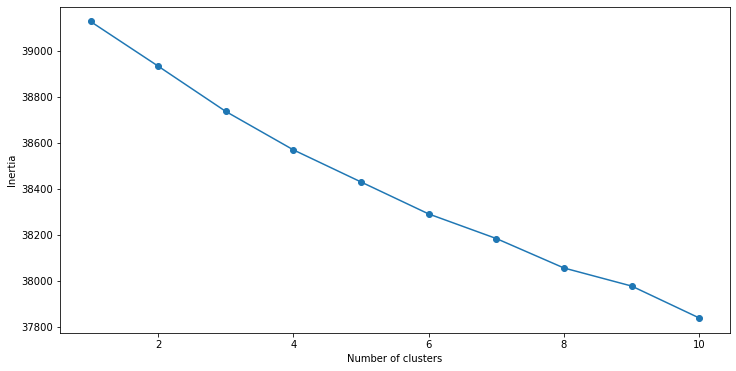

In [32]:
#Caculate the WSS for 1 to 20 positive documents clustering models, try to find out the elbow point 
WSS = calculate_WSS(positive_matrix,10)
print('WSS',WSS)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),WSS, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

WSS [20681.405565345598, 20529.112910428372, 20398.52812576896, 20304.39181321747, 20246.2137187311, 20164.349207699586, 20093.759407042013, 20027.564919034263, 19969.09238276908, 19934.3829119906]


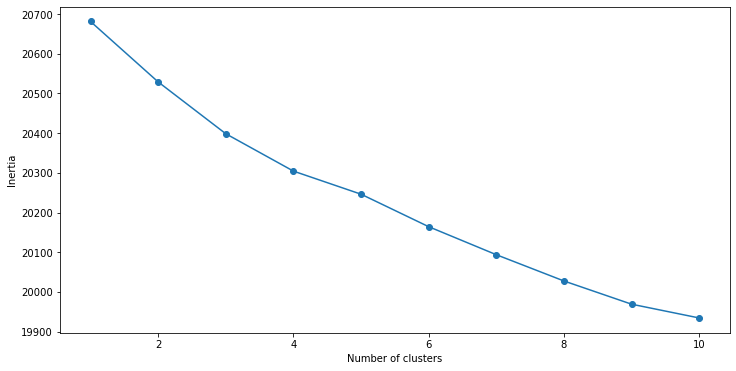

In [81]:
#Caculate the WSS for 1 to 20 negative documents clustering models, try to find out the elbow point 
WSS = calculate_WSS(negative_matrix,10)
print('WSS',WSS)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),WSS, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [84]:
#Choose K=10 to trian the positive documents clustering model
#Although it had not reach elbow points, to many clusters will be none sense
np.random.seed(2333)
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
%time km.fit(positive_matrix)

positive_clusters = km.labels_.tolist()

CPU times: user 40.6 s, sys: 2.02 s, total: 42.7 s
Wall time: 6.6 s


In [83]:
#Choose K=10 to trian the negative documents clustering model 
#Although it had not reach elbow points, to many clusters will be none sense
np.random.seed(2333)
num_clusters = 10
km_negative = KMeans(n_clusters=num_clusters)
%time km_negative.fit(negative_matrix)

negative_clusters = km_negative.labels_.tolist()

CPU times: user 15.1 s, sys: 960 ms, total: 16 s
Wall time: 2.47 s


In [85]:
#Check the number of records in each positive cluster
df_positive['Cluster'] = positive_clusters
df_positive['Cluster'].value_counts()

<ipython-input-85-209ebc59052b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Cluster'] = positive_clusters


0    20964
6     4317
4     4036
7     3427
8     1856
3     1735
5     1634
9      892
1      821
2      575
Name: Cluster, dtype: int64

In [86]:
#Check the number of records in each negative cluster
df_negative['Cluster'] = negative_clusters
df_negative['Cluster'].value_counts()

<ipython-input-86-63452628f7fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['Cluster'] = negative_clusters


0    11557
3     2211
2     2003
8     1204
7      934
5      912
1      895
9      640
6      638
4      459
Name: Cluster, dtype: int64

In [62]:
#Check the average star for each cluster, higher stars means higher compliment in positive reviews
grouped = df_positive['Star'].groupby(df_positive['Cluster'])
count = 0
for i in grouped.mean():
    print('Cluster {} has average {} stars'.format(count,i))
    count += 1

Cluster 0 has average 4.136245539889839 stars
Cluster 1 has average 3.979937737806987 stars
Cluster 2 has average 4.316283435007039 stars
Cluster 3 has average 4.190454545454545 stars
Cluster 4 has average 4.302369077306733 stars
Cluster 5 has average 4.358479179239589 stars
Cluster 6 has average 4.422740524781341 stars
Cluster 7 has average 3.9426723176444347 stars
Cluster 8 has average 4.132894736842105 stars
Cluster 9 has average 3.971311475409836 stars


In [87]:
#Check the average star for each cluster, lower stars means hasher criticism in negative reviews
grouped = df_negative['Star'].groupby(df_negative['Cluster'])
count = 0
for i in grouped.mean():
    print('Cluster {} has average {} stars'.format(count,i))
    count += 1

Cluster 0 has average 1.415217583193574 stars
Cluster 1 has average 1.5343855693348365 stars
Cluster 2 has average 1.3092470944921677 stars
Cluster 3 has average 1.5636942675159236 stars
Cluster 4 has average 1.5132743362831858 stars
Cluster 5 has average 1.4266666666666667 stars
Cluster 6 has average 1.3528481012658229 stars
Cluster 7 has average 1.3987138263665595 stars
Cluster 8 has average 1.6090225563909775 stars
Cluster 9 has average 1.171875 stars


In [108]:
#Use cluster centroids as the key words represent the meaning of each cluster in positive reviews
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    word_list=[]
    print("cluster%d:"% i)
    for j in order_centroids[i,:10]:
        word_list.append(positive_terms[j])
    print(word_list) 
#Some clusters represent purely compliment such as cluster 5 and 6
#While other like cluster 8 represents specific meaning of preference to domestic anime  

cluster0:
['觉得', '故事', '真的', '梦想', '不错', '看到', '大圣', '爱情', '五星', '感觉']
cluster1:
['电影院', '电影', '值得 电影院', '值得', '真的', '第一次', '看到', '觉得', '不错', '感觉']
cluster2:
['七月', '安生', '七月 安生', '安生 七月', '冬雨', '生活', '人生', '每个', '活成', '电影']
cluster3:
['好看', '觉得 好看', '觉得', '真的', '真的 好看', '好看 好看', '电影', '剧情', '电影 好看', '特别']
cluster4:
['特效', '星爷', '周星驰', '徐克', '吴亦凡', '西游', '不错', '演技', '唐僧', '剧情']
cluster5:
['喜欢', '喜欢 喜欢', '电影', '这种', '觉得', '好看', '喜欢 这种', '真的', '不错', '故事']
cluster6:
['电影', '这部', '这部 电影', '一部', '一部 电影', '觉得', '真的', '不错', '青春', '中国']
cluster7:
['画面', '剧情', '音乐', '故事', '不错', '配乐', '真的', '觉得', '中国', '有点']
cluster8:
['国产', '动画', '国产 动画', '良心', '中国', '动漫', '支持', '国产 动漫', '剧情', '希望']
cluster9:
['冬雨', '演技', '马思纯', '冬雨 演技', '不错', '冬雨 马思纯', '青春片', '安妮', '安妮 宝贝', '宝贝']


In [106]:
#Use cluster centroids as the key words represent the meaning of each cluster in negative reviews
order_centroids = km_negative.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    word_list=[]
    print("cluster%d:"% i)
    for j in order_centroids[i,:10]:
        word_list.append(negative_terms[j])
    print(word_list) 
    
#Some clusters represent purely criticism such as cluster 9 and 2
#While other like cluster 1 represents specific meaning of antipathy of some characters such as Chris Wu

cluster0:
['片子', '觉得', '特效', '演技', '导演', '真是', '看到', '时代', '感觉', '一颗']
cluster1:
['尴尬', '吴亦凡', '演技', '特效', '台词', '全程', '剧情', '吴亦凡 演技', '全程 尴尬', '演技 尴尬']
cluster2:
['电影', '这部 电影', '这部', '一部', '一部 电影', '看过', '这种', '中国', '导演', '中国 电影']
cluster3:
['剧情', '画面', '台词', '音乐', '特效', '不错', '女主', '配乐', '画面 剧情', '演技']
cluster4:
['好看', '觉得', '真的 好看', '觉得 好看', '真的', '电影', '剧情', '电视剧', '真心', '好看 剧情']
cluster5:
['真的', '电影', '剧情', '演技', '剧情 真的', '觉得', '特效', '吴亦凡', '难看', '失望']
cluster6:
['知道', '电影', '完全', '看过', '剧情', '完全 知道', '表达', '真的', '知道 表达', '片子']
cluster7:
['一星', '一星 特效', '一星 画面', '特效', '画面', '画面 一星', '剧情', '一星 画面 一星', '特效 一星', '电影']
cluster8:
['故事', '画面', '特效', '电影', '备胎', '剧情', '不好', '情怀', '人物', '逻辑']
cluster9:
['烂片', '一部', '一部 烂片', '电影', '这种', '这种 烂片', '一星', '烂片 烂片', '这部', '演技']


In [93]:
#Transfrom the comments from Cluster 8 in positive reviews into text file. 
Group8 = df_positive[lambda df_positive: df_positive['Cluster'] == 8] 
Group8_terms = Group8['Comment']

#After cut and removed Stop words, check the words in Cluster 8
vectorizer = CountVectorizer()
Group8_text = ''
for word in Group8_terms:
    allwords = word.split(' ')
    allwords_tfidf = [word for word in allwords if word in terms]
    for i in allwords_tfidf:
        Group8_text += i
        Group8_text += ' '
    
f = open("Group8.txt",'w',encoding='utf-8') 
f.write(Group8_text)  
f.close()

In [94]:
#Creat word cloud to understand the deeper meaning of Cluster 8 
import stylecloud
from palettable.cartocolors.sequential import BluGrn_7

stylecloud.gen_stylecloud(file_path = "Group8.txt",
                          font_path = 'SourceHanSansCN-Regular-2.otf',
                          size = 500,
                          output_name = 'Group8.png',
                          icon_name = "fas fa-map-marked",
                          palette = 'cartocolors.sequential.BluGrn_7',
                          background_color='white',
                          gradient='horizontal')

In [95]:
#Transfrom the comments from Cluster 1 in negative reviews into text file.
Group1 = df_negative[lambda df_negative: df_negative['Cluster'] == 1] 
Group1_terms = Group1['Comment']

#After cut and removed Stop words, check the words in Cluster 1
Group1_text = ''
for word in Group1_terms:
    allwords = word.split(' ')
    allwords_tfidf = [word for word in allwords if word in negative_terms]
    for i in allwords_tfidf:
        Group1_text += i
        Group1_text += ' '
    
f = open("Group1.txt",'w',encoding='utf-8') 
f.write(Group1_text)  
f.close()

In [97]:
#Creat word cloud to understand the deeper meaning of Cluster 1 
import stylecloud
from palettable.cartocolors.sequential import RedOr_7

stylecloud.gen_stylecloud(file_path = "Group1.txt",
                          font_path = 'SourceHanSansCN-Regular-2.otf',
                          size = 500,
                          output_name = 'Group1.png',
                          icon_name = "fas fa-heart-broken",
                          palette = 'cartocolors.sequential.RedOr_7',
                          background_color='white',
                          gradient='horizontal')